<a href="https://colab.research.google.com/github/birchallchris/COMM2754/blob/main/Workshop__Scraping_Reddit_with_BeautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google CoLab**

This is a Google CoLab workbook. CoLab is a cloud scripting space that gives you access to an environment for programming that is already setup and which uses cloud computing hardware and resources. It is free to use with a Google account.

You can program in Python here without installing anything; most major libraries are installed. You can import and export data too, so it is a nice place to start learning about the tools available.

CoLab workbooks can be used to allow multiple authors to collaboratively create documents and programs. I have used GitHub (a seperate repository and version control system) to store this workbook and as a resuylt, when you access this workbook you will have your own copy to work on. Your edits won't affect the master copy and your work won't be affected by other students. You can save the workbook to your own Google or Github account whenever you want to.

**Scraping content from a web page using Python**

This workbook outlines a method of web scraping using python code. It attempts to scrape content from a page on www.reddit.com, but can be adapted to use on other websites. 

Web scraping is the process of finding specific types of content on a web page, isolating pieces of content using the HTML code that is used to present that category in the browser, and copying the specific content to another place, such as a spreadsheet or a database. 

Scraping can be used to collect data in order to answer research questions. For example, "Which words in redit conversation titles generate the most upvotes?". Different research questions  require different content to be scraped. Building your own scraper can allow you to harvest the bespoke data that you need for your research project.

On reddit.com pages exist that contain conversations. There are different conversation threads that have different metrics associated, such as ‘upvotes’ and comments. We are going to look at one thread called ‘ProgrammingBuddies’ - (https://www.reddit.com/r/ProgrammingBuddies/) - and attempt to scrape the conversation titles and upvote numbers from it.

*The workshop handout for this week details the process of isolating the content using the HTML code that surrounds it, and shows you how to build the scraper outside of Google CoLab.*


First, we need to identify the HTML that marks up the post titles. By using the code inspector in Chrome we can identify the code around each bit of content. We can see that the <div> that surrounds the post title has a lot of class names associated, but there is one simple one that seems to be ‘Post’ (see below):

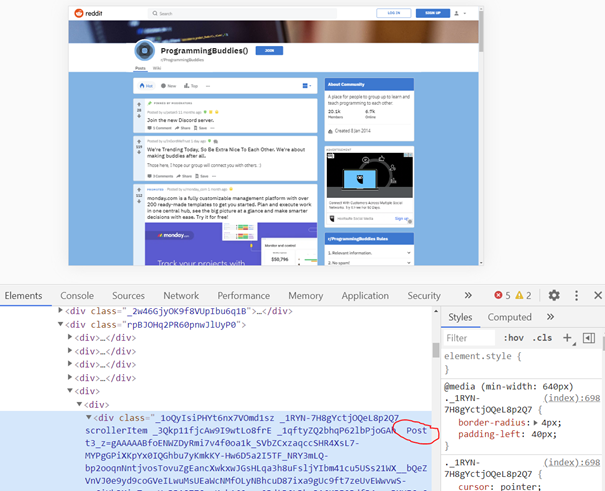
 
We can use this as a marker to identify posts within the page. That means that all posts on the page will be held within HTML <div> elements with the class name ‘Post’. If we can find that element, we can scrape the content from it, ignoring the rest of the content.
The code for the upvotes is a lot more complicated, there are a lot of elements encoding the up and down buttons as well as the numeric data itself. To make matters worse, the page is dynamic, showing upvotes changing in (nearly) real time – functionality which makes the HTML even more complicated as there have to be elements present that can be targeted and changed by a JavaScript script.
However, by drilling down into the structure we can find a particular attribute that seems to uniquely identify upvote number content – a <div> with a particular inline style applied (see below). This is not perfect, as this div encapsulates some of the dynamic elements – leading to a problem that I will discuss later – but it is good enough to identify the correct content most of the time.
 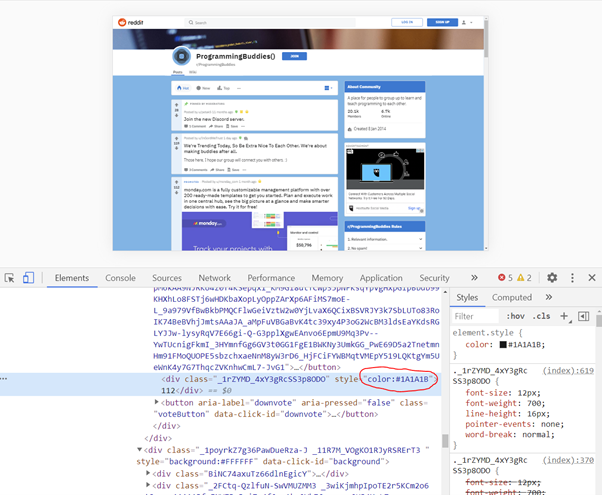
So, now that we know what code to look for in our page to isolate the content that we want we can write a python script to request our page and look through the source code for our markers, scraping any content held within them – building up a list of post titles and associated upvote numbers. See if you can spot these markers in the code below. 


**Script for Reddit scraping:**

In [19]:
from bs4 import BeautifulSoup
import csv

from urllib.request import urlopen
from urllib.request import Request

titles=[] #List to store post titles
upvotes=[] #List to store upvote value of a post
postcount=0
writecount = 0

url = "https://www.reddit.com/r/ProgrammingBuddies/"
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
page = urlopen(req)

soup = BeautifulSoup(page, "html.parser")
for post in soup.find_all('div', attrs={'class':'Post'}):
    title=post.find('h3')
    upvote_block = post.find('div', attrs={'style':'color:#1A1A1B'})
    titles.append(title.text)
    upvotes.append(upvote_block.text)
    postcount+=1

In [20]:
#in Python you use the word 'print' to output a variable to the console
print(postcount)

7


In [21]:
print(titles)

['Join the new Discord server.', 'Clarification on posting guidelines and off-topic content', 'Looking for a buddy to learn C# and Unity with', '[Next Gen Stats] Jets QB Mike White has a huge day in New York’s win over Cincinnati', 'Discord group for weekly projects', 'Looking for a beginner like me to learn C++ with.', 'Looking for a buddy to learn Rust with']


In [22]:
print(upvotes)

['30', '9', '4', 'Vote', '5', '5', '3']


**Exporting the data**

There are lots of ways to export data from colab, using your Google drive account or creating files that can be downloaded. 

One example is shown below. First, create a new file in the Files menu in the top left of the colab workbook if there is not already one there.
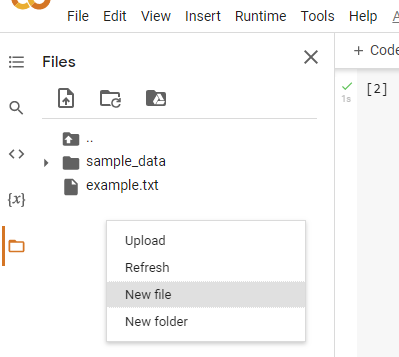 

*In the code below, the filename must exactly match the name of the file that you have created.*

*The path must also be correct - folder management is key here!*

To write the data to that file:

In [23]:
# Write line to file
# the second argument in the open() function - 'a' or 'w'- means 'append' (add data to the end of the file) or 'write' replace the data with new data
# the '\n' character is an 'end line' character and will mean that any more content is written on a new line

with open('example.txt', 'w') as writefile:
    for title in titles:
        writefile.write(title + ": " + upvotes[writecount] + "\n")

You can also read from this file:

In [24]:
# Read file

with open('example.txt', 'r') as writefile:
    print(writefile.read())

Join the new Discord server.: 30
Clarification on posting guidelines and off-topic content: 30
Looking for a buddy to learn C# and Unity with: 30
[Next Gen Stats] Jets QB Mike White has a huge day in New York’s win over Cincinnati: 30
Discord group for weekly projects: 30
Looking for a beginner like me to learn C++ with.: 30
Looking for a buddy to learn Rust with: 30



**Downloading the data**

You can download this file from the menu in colab by right-clicking and choosing 'download from the context menu.

**Working with CSV files and spreadsheets**

You can also use built-in libraries in python and colab (such as csv or pandas) to write data to spreadsheets as well as text files:

In [13]:
with open('redditposts.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    for title in titles:
        writer.writerow([title, upvotes[writecount]])
        writecount+=1

In [18]:
#rows written:
print(writecount)

7


In [17]:
#reading the csv file:
with open('redditposts.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
      print(row)

['Join the new Discord server.', '29']
['Clarification on posting guidelines and off-topic content', '9']
['Looking for a buddy to learn C# and Unity with', '4']
['Galaxy Z Fold3 5G is the perfect superhero sidekick for your everyday adventures — with three multi-windows that help you manage your day, knock out tasks and take on to-do lists with ease. So pick up yours and show us what you’ve got.', '103']
['Discord group for weekly projects', '4']
['Looking for a beginner like me to learn C++ with.', '5']
['Looking for a buddy to learn Rust with', '3']


You can downlaod this CSV file for use elsewhere, save it to your Google drive, or process it further with data libraries and visualisation tools within python.

One such data library is Pandas. See this tutorial for more details: https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb

One graphing library for charts is matplotlib: https://colab.research.google.com/notebooks/charts.ipynb

**The challenge for this week**

*Scrape different data from a different website!*

Think about research questions that you could answer using scraped data from online digital platforms. Which websites would you need to access? How is the data marked up?

Identify the markers in the HTML code that identify the content types that you want toscrape and modify the code above to scrape a web page, write the data to file and download it to your local machine.

You can add a code section at the bottom of this workbook to hiold your new code (so the existing code above remains unchanged).